## Выгрузка входных данных

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/archive_daytime.zip'

Archive:  /content/drive/MyDrive/archive_daytime.zip
   creating: archive_daytime/
   creating: archive_daytime/daytime/
  inflating: archive_daytime/daytime/daylight_0.jpeg  
  inflating: archive_daytime/daytime/daylight_1.jpeg  
  inflating: archive_daytime/daytime/daylight_10.jpeg  
  inflating: archive_daytime/daytime/daylight_100.jpeg  
  inflating: archive_daytime/daytime/daylight_101.jpeg  
  inflating: archive_daytime/daytime/daylight_102.jpeg  
  inflating: archive_daytime/daytime/daylight_103.jpeg  
  inflating: archive_daytime/daytime/daylight_105.jpeg  
  inflating: archive_daytime/daytime/daylight_106.jpeg  
  inflating: archive_daytime/daytime/daylight_107.jpeg  
  inflating: archive_daytime/daytime/daylight_109.jpeg  
  inflating: archive_daytime/daytime/daylight_11.jpeg  
  inflating: archive_daytime/daytime/daylight_110.jpeg  
  inflating: archive_daytime/daytime/daylight_111.jpeg  
  inflating: archive_daytime/daytime/daylight_112.jpeg  
  inflating: archive_daytime/d

## Разбиение на подпапки

In [ ]:
import os
from sklearn.model_selection import train_test_split
import shutil

In [ ]:
import shutil
shutil.rmtree('/content/images')

In [ ]:
NIGHT_PATH = '/content/archive_daytime/nighttime'
DAY_PATH = '/content/archive_daytime/daytime'
SUNRISE_PATH = '/content/archive_daytime/sunrise'

#os.makedirs('images')

INPUT_DIR = 'images'

TRAIN_PATH = f'{INPUT_DIR}/train'
TEST_PATH = f'{INPUT_DIR}/test'

if not os.path.exists(INPUT_DIR):
  os.makedirs(TRAIN_PATH)
  os.makedirs(TEST_PATH)

if os.path.exists(TRAIN_PATH) and os.path.exists(TEST_PATH):
  os.makedirs(f'{TRAIN_PATH}/nighttime')
  os.makedirs(f'{TEST_PATH}/nighttime')
  os.makedirs(f'{TRAIN_PATH}/daytime')
  os.makedirs(f'{TEST_PATH}/daytime')
  os.makedirs(f'{TRAIN_PATH}/sunrise')
  os.makedirs(f'{TEST_PATH}/sunrise')

In [ ]:
night_names = os.listdir(NIGHT_PATH)
train_night_names, test_night_names = train_test_split(night_names, test_size=0.2, random_state=0)

for img in train_night_names:
  shutil.copyfile(os.path.join(NIGHT_PATH, img), os.path.join(f'{TRAIN_PATH}/nighttime', img))

for img in test_night_names:
  shutil.copyfile(os.path.join(NIGHT_PATH, img), os.path.join(f'{TEST_PATH}/nighttime', img))

In [ ]:
day_names = os.listdir(DAY_PATH)
train_day_names, test_day_names = train_test_split(day_names, test_size=0.2, random_state=0)

for img in train_day_names:
  shutil.copyfile(os.path.join(DAY_PATH, img), os.path.join(f'{TRAIN_PATH}/daytime', img))

for img in test_day_names:
  shutil.copyfile(os.path.join(DAY_PATH, img), os.path.join(f'{TEST_PATH}/daytime', img))

In [ ]:
sunrise_names = os.listdir(SUNRISE_PATH)
train_sunrise_names, test_sunrise_names = train_test_split(sunrise_names, test_size=0.2, random_state=0)

for img in train_sunrise_names:
  shutil.copyfile(os.path.join(SUNRISE_PATH, img), os.path.join(f'{TRAIN_PATH}/sunrise', img))

for img in test_sunrise_names:
  shutil.copyfile(os.path.join(SUNRISE_PATH, img), os.path.join(f'{TEST_PATH}/sunrise', img))

In [ ]:
train_dir = '/content/images/train'
val_dir = '/content/images/test'

In [ ]:
NUM_CLASSES = 3

img_width, img_height = 224, 224

batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 2098 images belonging to 3 classes.
Found 525 images belonging to 3 classes.


## Визуализация с понижением размерности

In [ ]:
!pip uninstall umap
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=57e02ac44ab203530df38ea6b4f168b3c42b39e702624ebf704851ad28644640
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=d968befc9abc9317af514fc620d1daa0bdac59327b40ed0cc999c12b843a10a8
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
import pandas as pd
import os
import cv2
import numpy as np
import umap.umap_ as umap
import matplotlib.pyplot as plt

In [ ]:
image_directory = "/content/archive_daytime/"
categories = ["daytime", "nighttime", "sunrise"]
image_size = (224, 224)

#список для хранения данных и соответствующих меток
data = []
labels = []

for category in categories:
    path = os.path.join(image_directory, category)
    class_label = categories.index(category)

    for image_name in os.listdir(path):
        image_path = os.path.join(path, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, image_size)

        #изображение в плоский вектор
        image_vector = image.flatten()

        data.append(image_vector)
        labels.append(class_label)

data = np.array(data)
labels = np.array(labels)

In [ ]:
#экземпляр UMAP
reducer = umap.UMAP()

#метод снижения размерности к данным
embedding = reducer.fit_transform(data)

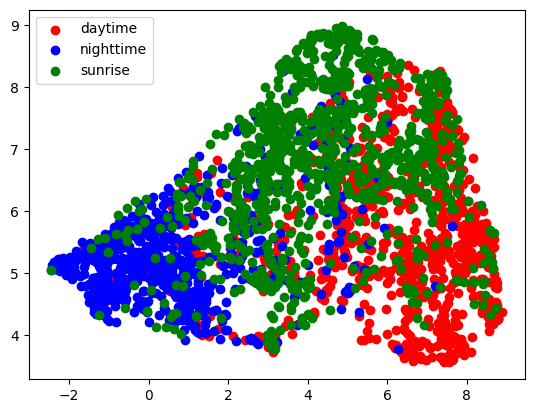

In [ ]:
category_colors = ['red', 'blue', 'green']

#диаграмма рассеяния с координатами из матрицы embedding
for category in range(len(categories)):
    plt.scatter(
        embedding[labels == category, 0],  # Координата X
        embedding[labels == category, 1],  # Координата Y
        color=category_colors[category],
        label=categories[category]
    )

plt.legend()
plt.show()

## Модель 1

In [ ]:
from tensorflow import random

In [ ]:
np.random.seed(42)
random.set_seed(42)

In [ ]:
train_generator1 = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    seed=42,
    class_mode='categorical')

val_generator1 = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    seed=42,
    class_mode='categorical')

Found 2098 images belonging to 3 classes.
Found 525 images belonging to 3 classes.


In [ ]:
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model1.compile(optimizer=Adam(learning_rate=0.01), #Adam(learning_rate=0.01)
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 10
history = model1.fit(
    train_generator1,
    epochs=epochs,
    validation_data=val_generator1)

Epoch 1/10
66/66 [==============================] - 286s 4s/step - loss: 7.3711 - accuracy: 0.5567 - val_loss: 0.7977 - val_accuracy: 0.6667
Epoch 2/10
66/66 [==============================] - 266s 4s/step - loss: 0.7198 - accuracy: 0.6954 - val_loss: 0.6952 - val_accuracy: 0.6819
Epoch 3/10
66/66 [==============================] - 265s 4s/step - loss: 0.6782 - accuracy: 0.7021 - val_loss: 0.6645 - val_accuracy: 0.7448
Epoch 4/10
66/66 [==============================] - 267s 4s/step - loss: 0.6739 - accuracy: 0.7035 - val_loss: 0.6752 - val_accuracy: 0.7162
Epoch 5/10
66/66 [==============================] - 266s 4s/step - loss: 0.6476 - accuracy: 0.7250 - val_loss: 0.7036 - val_accuracy: 0.7162
Epoch 6/10
66/66 [==============================] - 266s 4s/step - loss: 0.6346 - accuracy: 0.7297 - val_loss: 0.6299 - val_accuracy: 0.7200
Epoch 7/10
66/66 [==============================] - 265s 4s/step - loss: 0.6383 - accuracy: 0.7269 - val_loss: 0.6395 - val_accuracy: 0.7276
Epoch 8/10
66

In [ ]:
score = model1.evaluate(val_generator)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

17/17 [==============================] - 19s 1s/step - loss: 0.6498 - accuracy: 0.7162
Validation loss: 0.6497895121574402
Validation accuracy: 0.7161904573440552


In [ ]:
model1.save("model1.h5")

### Визуализация модели 1

In [ ]:
from keras.utils import load_img, img_to_array
from IPython.display import Image, display
import numpy as np

In [ ]:
def image_result(img_path, model):
  image_size = 224
  labels = {0: 'Daytime', 1: 'Nighttime', 2: 'Sunrise'}
  image = load_img(img_path, target_size=(image_size, image_size), color_mode='rgb')
  data = np.array([img_to_array(image)])

  pred = model.predict(data)
  print('Предсказания модели в виде вероятностей:\n', *zip(pred[0], labels.values()))
  display(Image(img_path))

1/1 [==============================] - 0s 119ms/step
Предсказания модели в виде вероятностей:
 (0.0, 'Daytime') (0.0, 'Nighttime') (1.0, 'Sunrise')


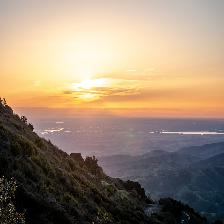

In [ ]:
img_path = '/content/images/test/sunrise/sunrise_101.jpeg'
image_result(img_path, model1)

1/1 [==============================] - 0s 54ms/step
Предсказания модели в виде вероятностей:
 (1.0, 'Daytime') (0.0, 'Nighttime') (0.0, 'Sunrise')


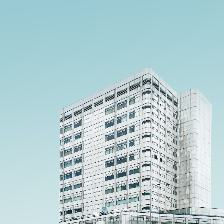

In [ ]:
img_path = '/content/images/test/daytime/daylight_101.jpeg'
image_result(img_path, model1)

1/1 [==============================] - 0s 150ms/step
Предсказания модели в виде вероятностей:
 (1.0, 'Daytime') (0.0, 'Nighttime') (0.0, 'Sunrise')


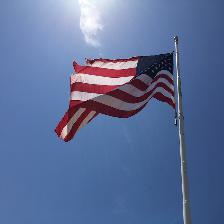

In [ ]:
img_path = '/content/images/test/daytime/daylight_444.jpeg'
image_result(img_path, model1)

## Model 2

In [ ]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs2 = 20
history2 = model2.fit(
    train_generator,
    epochs=epochs2,
    validation_data=val_generator)

Epoch 1/20
66/66 [==============================] - 303s 5s/step - loss: 0.5904 - accuracy: 0.7607 - val_loss: 0.4781 - val_accuracy: 0.8152
Epoch 2/20
66/66 [==============================] - 302s 5s/step - loss: 0.4007 - accuracy: 0.8499 - val_loss: 0.3595 - val_accuracy: 0.8705
Epoch 3/20
66/66 [==============================] - 299s 5s/step - loss: 0.3720 - accuracy: 0.8646 - val_loss: 0.3674 - val_accuracy: 0.8610
Epoch 4/20
66/66 [==============================] - 298s 5s/step - loss: 0.3497 - accuracy: 0.8737 - val_loss: 0.3054 - val_accuracy: 0.8857
Epoch 5/20
66/66 [==============================] - 299s 5s/step - loss: 0.3365 - accuracy: 0.8785 - val_loss: 0.3319 - val_accuracy: 0.8743
Epoch 6/20
66/66 [==============================] - 299s 5s/step - loss: 0.2511 - accuracy: 0.9099 - val_loss: 0.3665 - val_accuracy: 0.8724
Epoch 7/20
66/66 [==============================] - 299s 5s/step - loss: 0.2224 - accuracy: 0.9199 - val_loss: 0.3960 - val_accuracy: 0.8648
Epoch 8/20
66

In [ ]:
score2 = model2.evaluate(val_generator)
print('Validation loss:', score2[0])
print('Validation accuracy:', score2[1])

17/17 [==============================] - 22s 1s/step - loss: 0.8460 - accuracy: 0.8610
Validation loss: 0.8459953665733337
Validation accuracy: 0.8609523773193359


In [ ]:
model2.save("model2.h5")

1/1 [==============================] - 0s 57ms/step
Предсказания модели в виде вероятностей:
 (1.0, 'Daytime') (0.0, 'Nighttime') (0.0, 'Sunrise')


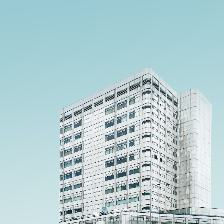

In [ ]:
img_path = '/content/images/test/daytime/daylight_101.jpeg'
image_result(img_path, model2)

1/1 [==============================] - 0s 66ms/step
Предсказания модели в виде вероятностей:
 (0.0, 'Daytime') (0.0, 'Nighttime') (1.0, 'Sunrise')


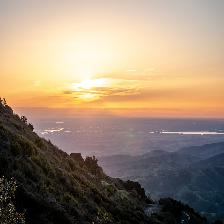

In [ ]:
img_path = '/content/images/test/sunrise/sunrise_101.jpeg'
image_result(img_path, model2)

1/1 [==============================] - 0s 60ms/step
Предсказания модели в виде вероятностей:
 (0.0, 'Daytime') (1.0, 'Nighttime') (0.0, 'Sunrise')


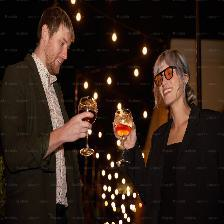

In [ ]:
img_path = '/content/images/test/nighttime/Nighttime_155.jpeg'
image_result(img_path, model2)

1/1 [==============================] - 0s 72ms/step
Предсказания модели в виде вероятностей:
 (0.0, 'Daytime') (0.0, 'Nighttime') (1.0, 'Sunrise')


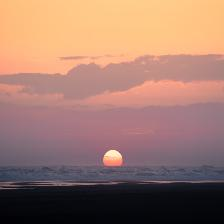

In [ ]:
img_path = '/content/images/test/sunrise/sunrise_264.jpeg'
image_result(img_path, model2)

## Модель 3

In [ ]:
from tensorflow import random

In [ ]:
np.random.seed(42)
random.set_seed(42)

In [ ]:
train_generator3 = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    seed=42,
    class_mode='categorical')

val_generator3 = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    seed=42,
    class_mode='categorical')

Found 2098 images belonging to 3 classes.
Found 525 images belonging to 3 classes.


In [ ]:
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model3.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#model.compile(optimizer=Adam(learning_rate=0.01),

In [ ]:
epochs3 = 10
history3 = model3.fit(
    train_generator3,
    epochs=epochs3,
    validation_data=val_generator3)

Epoch 1/10
66/66 [==============================] - 275s 4s/step - loss: 0.6831 - accuracy: 0.6911 - val_loss: 0.3940 - val_accuracy: 0.8648
Epoch 2/10
66/66 [==============================] - 266s 4s/step - loss: 0.4377 - accuracy: 0.8298 - val_loss: 0.4525 - val_accuracy: 0.8514
Epoch 3/10
66/66 [==============================] - 272s 4s/step - loss: 0.4116 - accuracy: 0.8422 - val_loss: 0.3208 - val_accuracy: 0.9010
Epoch 4/10
66/66 [==============================] - 268s 4s/step - loss: 0.3385 - accuracy: 0.8675 - val_loss: 0.3354 - val_accuracy: 0.8990
Epoch 5/10
66/66 [==============================] - 265s 4s/step - loss: 0.2951 - accuracy: 0.8856 - val_loss: 0.3901 - val_accuracy: 0.8514
Epoch 6/10
66/66 [==============================] - 263s 4s/step - loss: 0.3295 - accuracy: 0.8808 - val_loss: 0.2805 - val_accuracy: 0.8876
Epoch 7/10
66/66 [==============================] - 263s 4s/step - loss: 0.2520 - accuracy: 0.9080 - val_loss: 0.4142 - val_accuracy: 0.8514
Epoch 8/10
66

In [ ]:
score3 = model3.evaluate(val_generator)
print('Validation loss:', score3[0])
print('Validation accuracy:', score3[1])

17/17 [==============================] - 19s 1s/step - loss: 0.3784 - accuracy: 0.8838
Validation loss: 0.37842169404029846
Validation accuracy: 0.883809506893158


In [ ]:
model3.save("model3.h5")

In [ ]:
model3_saved = load_model('/content/drive/MyDrive/model3.h5')

1/1 [==============================] - 0s 464ms/step
Предсказания модели в виде вероятностей:
 (1.0, 'Daytime') (0.0, 'Nighttime') (0.0, 'Sunrise')


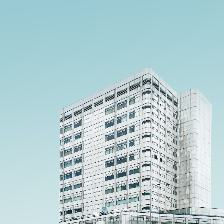

In [ ]:
img_path = '/content/images/test/daytime/daylight_101.jpeg'
image_result(img_path, model3_saved)

1/1 [==============================] - 0s 62ms/step
Предсказания модели в виде вероятностей:
 (0.0, 'Daytime') (0.0, 'Nighttime') (1.0, 'Sunrise')


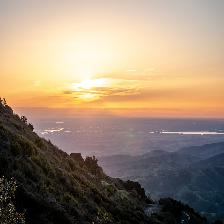

In [ ]:
img_path = '/content/images/test/sunrise/sunrise_101.jpeg'
image_result(img_path, model3_saved)

1/1 [==============================] - 0s 96ms/step
Предсказания модели в виде вероятностей:
 (0.0, 'Daytime') (1.0, 'Nighttime') (0.0, 'Sunrise')


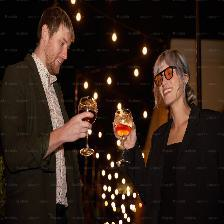

In [ ]:
img_path = '/content/images/test/nighttime/Nighttime_155.jpeg'
image_result(img_path, model3_saved)

1/1 [==============================] - 0s 55ms/step
Предсказания модели в виде вероятностей:
 (0.0, 'Daytime') (0.0, 'Nighttime') (1.0, 'Sunrise')


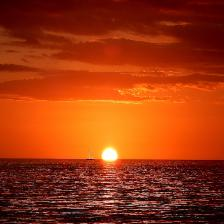

In [ ]:
img_path = '/content/images/test/sunrise/sunrise_320.jpeg'
image_result(img_path, model3_saved)

1/1 [==============================] - 0s 90ms/step
Предсказания модели в виде вероятностей:
 (1.0, 'Daytime') (0.0, 'Nighttime') (0.0, 'Sunrise')


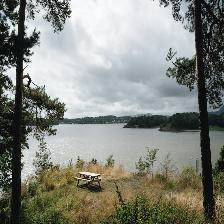

In [ ]:
img_path = '/content/images/test/daytime/daylight_243.jpeg'
image_result(img_path, model3_saved)